In [1]:
from __future__ import division
from __future__ import print_function
from jinja2 import Template

import data_tools
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
from decimal import Decimal

import itertools


%matplotlib inline

In [2]:
root_path = '/home/ruffsl/Desktop/bag_final';
bag_folder_names = [
    'ojflo_data',
    'ojflo_occ',
    'ron_data',
    'ron_occ',
    'tide',
    'tide_occ',
    
    'ojflo_data_svo',
    'ojflo_occ_svo',
    'ron_data_svo',
    'ron_occ_svo',
    'tide_svo',
    'tide_occ_svo',
    
    'ojflo_data_particle',
    'ojflo_occ_particle',
    'ron_data_particle',
    'ron_occ_particle',
    'tide_particle',
    'tide_occ_particle',
    ]

In [3]:
! cp bag2file.bash {root_path}
! cd {root_path} && ./bag2file.bash

Extracting: ojflo_data.bag
Extracting: ojflo_data_particle.bag
Extracting: ojflo_data_svo.bag
Extracting: ojflo_occ.bag
Extracting: ojflo_occ_particle.bag
Extracting: ojflo_occ_svo.bag
Extracting: ron_data.bag
Extracting: ron_data_particle.bag
Extracting: ron_data_svo.bag
Extracting: ron_occ.bag
Extracting: ron_occ_particle.bag
Extracting: ron_occ_svo.bag
Extracting: tide.bag
Extracting: tide_occ.bag
Extracting: tide_occ_particle.bag
Extracting: tide_occ_svo.bag
Extracting: tide_particle.bag
Extracting: tide_svo.bag


In [4]:
for bag in bag_folder_names:
    print(bag,':')
    folder_path = os.path.join(root_path, bag)
    data_tools.synchronize_Object_TF_Pose(folder_path)

ojflo_data :
	base_df2:  (2454, 8)
	object_df2:  (2454, 8)
ojflo_occ :
	base_df2:  (2457, 8)
	object_df2:  (2457, 8)
ron_data :
	base_df2:  (2376, 8)
	object_df2:  (2376, 8)
ron_occ :
	base_df2:  (2700, 8)
	object_df2:  (2700, 8)
tide :
	base_df2:  (2938, 8)
	object_df2:  (2938, 8)
tide_occ :
	base_df2:  (2714, 8)
	object_df2:  (2714, 8)
ojflo_data_svo :
	base_df2:  (2266, 8)
	object_df2:  (2266, 8)
ojflo_occ_svo :
	base_df2:  (1861, 8)
	object_df2:  (1861, 8)
ron_data_svo :
	base_df2:  (2241, 8)
	object_df2:  (2241, 8)
ron_occ_svo :
	base_df2:  (2651, 8)
	object_df2:  (2651, 8)
tide_svo :
	base_df2:  (2938, 8)
	object_df2:  (2938, 8)
tide_occ_svo :
	base_df2:  (2715, 8)
	object_df2:  (2715, 8)
ojflo_data_particle :
	base_df2:  (3458, 8)
	object_df2:  (3458, 8)
ojflo_occ_particle :
	base_df2:  (2688, 8)
	object_df2:  (2688, 8)
ron_data_particle :
	base_df2:  (2613, 8)
	object_df2:  (2613, 8)
ron_occ_particle :
	base_df2:  (2703, 8)
	object_df2:  (2703, 8)
tide_particle :
	base_df2:  (2

In [133]:
for bag in bag_folder_names:
    print(bag,':')
    base_poses_path = os.path.join(root_path, bag, 'base_sync.txt')
    object_poses_path = os.path.join(root_path, bag, 'object_sync.txt')
    object_error_path = os.path.join(root_path, bag, 'object_error.txt')
    data_tools.getGlobalErrors(base_poses_path, object_poses_path, object_error_path)

ojflo_data :
ojflo_occ :
ron_data :
ron_occ :
tide :
tide_occ :
ojflo_data_svo :
ojflo_occ_svo :
ron_data_svo :
ron_occ_svo :
tide_svo :
tide_occ_svo :
ojflo_data_particle :
ojflo_occ_particle :
ron_data_particle :
ron_occ_particle :
tide_particle :
tide_occ_particle :


In [134]:
def read_error(file_path):
    error_df = pd.read_csv(file_path, header=None)
    return error_df

def read_time(file_path):
    time_df = pd.read_csv(file_path, header=None)
    time_s = [datetime.datetime.fromtimestamp(x) for x in time_df[0]]
    time_s = [(x-time_s[0]).total_seconds() for x in time_s]
    time = np.array(time_s)
    return time

def plot_error(error_df, error_th):
    error_df.plot(ylim=[0, error_th], rot=45)
    ax = plt.gcf()
    ax.autofmt_xdate()
#     error_df.plot()
    
def filter_error(error_df, error_th):
    error_df[0][error_df[0]>=error_th] = pd.NaT
    return error_df

def get_ratio(error_df, error_th):
    drops = error_df[0]>=error_th
    return np.sum(drops)/len(drops)

def get_mean(error_df):
    return error_df[0].mean(axis=0)

In [224]:
error_th = 0.5

results = {}

for bag in bag_folder_names:
    print(bag,':')
    error_file_path = os.path.join(root_path, bag, 'object_error.txt')
    error_df = read_error(error_file_path)
    object_file_path = os.path.join(root_path, bag, 'object_sync.txt')
    time = read_time(object_file_path)
    error_df = error_df.set_index(time)
    
    ratio = 100 - 100*get_ratio(error_df, error_th)
    print('\tRatio: ', ratio)
    
    error_df = filter_error(error_df, error_th)
    mean = get_mean(error_df)
    print('\tMean: ', mean)
    
#     plot_error(error_df, error_th)
#     plt.show()
    
    error_df.columns = [bag]
    bag_results = {'ratio':"{:0.2f}".format(ratio),
                   'mean':"{:0.3f}".format(mean),
                   'error_df':error_df}
    results[bag] = bag_results
    
#     break

ojflo_data :
	Ratio:  33.7408312958
	Mean:  0.191553239493
ojflo_occ :
	Ratio:  82.9873829874
	Mean:  0.249828585091
ron_data :
	Ratio:  43.6447811448
	Mean:  0.273927922179
ron_occ :
	Ratio:  99.5925925926
	Mean:  0.196818217888
tide :
	Ratio:  41.252552757
	Mean:  0.281948957921
tide_occ :
	Ratio:  85.2247605011
	Mean:  0.19359394038
ojflo_data_svo :
	Ratio:  30.0970873786
	Mean:  0.189068358109
ojflo_occ_svo :
	Ratio:  64.4277270285
	Mean:  0.23313223995
ron_data_svo :
	Ratio:  41.3654618474
	Mean:  0.303087986505
ron_occ_svo :
	Ratio:  99.0946812524
	Mean:  0.187689764903
tide_svo :
	Ratio:  41.9673247107
	Mean:  0.288802733658
tide_occ_svo :
	Ratio:  86.8876611418
	Mean:  0.210398026198
ojflo_data_particle :
	Ratio:  21.9491035281
	Mean:  0.218890402503
ojflo_occ_particle :
	Ratio:  75.5580357143
	Mean:  0.257425048252
ron_data_particle :
	Ratio:  23.230003827
	Mean:  0.239358046293
ron_occ_particle :
	Ratio:  94.0806511284
	Mean:  0.215311636107
tide_particle :
	Ratio:  30.088495

In [215]:
def plot_errors(results, bags_to_plot, error_th=None):
    fig, ax = plt.subplots(figsize=(8,4))
    for key in bags_to_plot.iterkeys():
        color = bags_to_plot[key]
        plt.hold(True)
        results[key]['error_df'].plot(ax=ax, linewidth=1, color=color, ylim=[0, error_th])
#         plt.xlabel("Time (sec)")
#         plt.ylabel("Error (m)")
    bags = bags_to_plot.keys()
    fig_name = "figures/" + "-".join(sorted(bags)) + '.pdf'
#     print(fig_name)
    plt.tight_layout()
    plt.savefig(fig_name)
    plt.show()

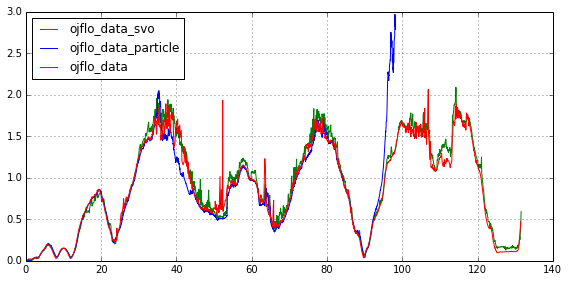

In [216]:
bags_to_plot = {
    'ojflo_data':'red',
    'ojflo_data_svo':'green',
    'ojflo_data_particle':'blue',
    }

plot_errors(results, bags_to_plot, error_th)

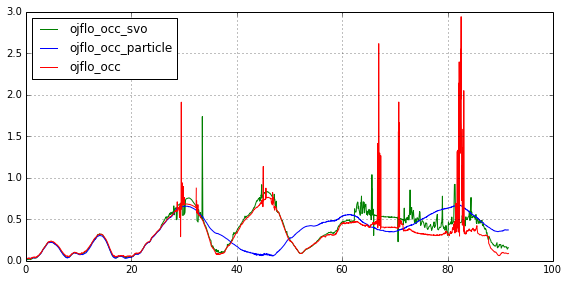

In [217]:
bags_to_plot = {
    'ojflo_occ':'red',
    'ojflo_occ_svo':'green',
    'ojflo_occ_particle':'blue',
    }

plot_errors(results, bags_to_plot, error_th)

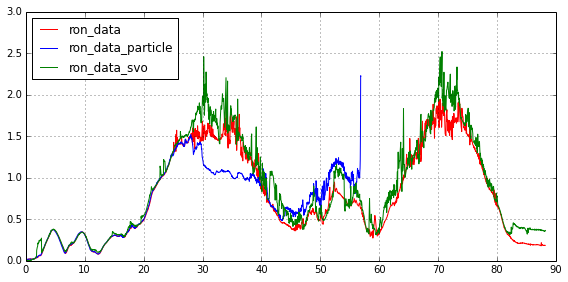

In [218]:
bags_to_plot = {
    'ron_data':'red',
    'ron_data_svo':'green',
    'ron_data_particle':'blue',
    }

plot_errors(results, bags_to_plot, error_th)

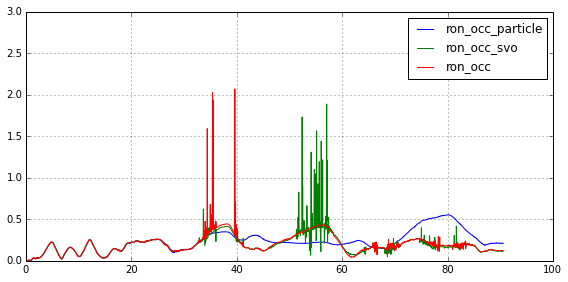

In [219]:
bags_to_plot = {
    'ron_occ':'red',
    'ron_occ_svo':'green',
    'ron_occ_particle':'blue',
    }

plot_errors(results, bags_to_plot, error_th)

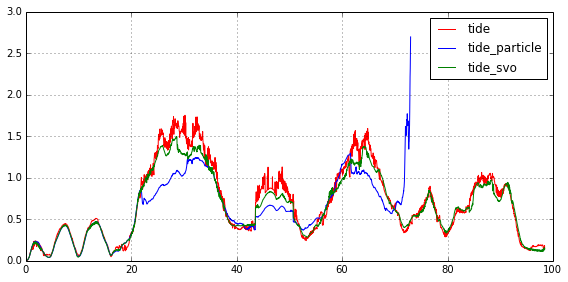

In [220]:
bags_to_plot = {
    'tide':'red',
    'tide_svo':'green',
    'tide_particle':'blue',
    }

plot_errors(results, bags_to_plot, error_th)

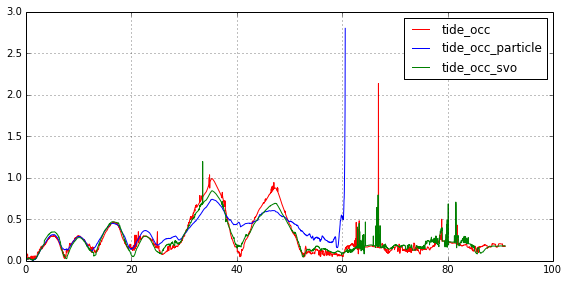

In [221]:
bags_to_plot = {
    'tide_occ':'red',
    'tide_occ_svo':'green',
    'tide_occ_particle':'blue',
    }

plot_errors(results, bags_to_plot, error_th)

In [143]:
# lol = pd.concat([foo, bar], axis=1)
# lol.plot()

In [225]:
template = data_tools.texenv.get_template('template.tex')
output = template.render(results=results)
print(output)

% Please add the following required packages to your document preamble:
% \usepackage{multirow}
\begin{table}[]
\centering
\begin{tabular}{ll|c|c|c|}
\cline{3-5}
                                                                                                 &        & \multicolumn{3}{c|}{\textbf{Method}}                                                                                                                                   \\ \hline
\multicolumn{2}{|c|}{\textbf{Dataset}}                                                                    & \textit{SVO}                                          & \textit{Particle}                                          & \textit{Approach}                                 \\ \hline
\multicolumn{1}{|l|}{\multirow{2}{*}{\begin{tabular}[c]{@{}l@{}}Orange\\ Juice\end{tabular}}}    & mean [m] & 0.189  & 0.219  & 0.192  \\ \cline{2-2}
\multicolumn{1}{|l|}{}                                                                           & ratio \% & 30.10 & 